In [1]:
import pandas as pd

# Load the dataset
df = "/Users/booba/Downloads/Financial_inclusion_dataset.csv" 
DataFIA = pd.read_csv(df)


In [3]:
# Display the first few rows
DataFIA.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Check the shape of the dataset
print(DataFIA.shape)

(23524, 13)


In [5]:
# Check column names
print(DataFIA.columns)

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')


In [6]:
print(DataFIA.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [7]:
print(DataFIA.describe())

               year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000


In [9]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(DataFIA, title="Financial Inclusion Dataset Report")
profile.to_file("/Users/booba/Desktop/mon_environnement/financial_inclusion_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 282.81it/s]


In [11]:
print(DataFIA.duplicated().sum())

0


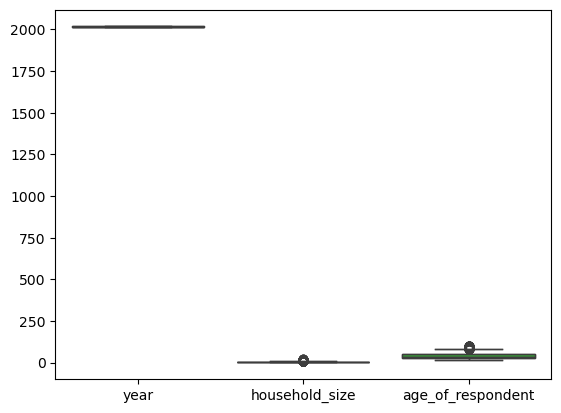

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize outliers using boxplots
sns.boxplot(data=DataFIA)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
for col in DataFIA.select_dtypes(include=['object']).columns:
    DataFIA[col] = label_encoder.fit_transform(DataFIA[col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = DataFIA.drop('bank_account', axis=1)  # Replace 'target_column' with the actual target column name
y = DataFIA['bank_account']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8865037194473964


In [18]:
import pickle

with open('financial_inclusion_model.pkl', 'wb') as file:
    pickle.dump(model, file)